## <font color=red><center> Load Libraries </center></font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller

## <font color=red><center> Load HTML file containing garlic prices data </center></font>

In [3]:
df = pd.read_html("MonthWiseMarketArrivals.html", 
                  attrs={
                  'id': 'dnn_ctr974_MonthWiseMarketArrivals_GridView1'})[0]

In [4]:
df.shape

(7078, 7)

In [5]:
df.head(2)

,Market,Month Name,Year,Arrival (q),Price Minimum (Rs/q),Price Maximum (Rs/q),Modal Price (Rs/q)
0,ABOHAR(PB),January,2020,1,7000,13600,10100
1,ABOHAR(PB),January,2021,3,5580,9010,7693


In [8]:
print(pd.unique(df['Market']))
print(len(pd.unique(df['Market'])))

['ABOHAR(PB)' 'AGRA(UP)' 'AHMEDABAD(GUJ)' 'AHMEDNAGAR(MS)'
 'AIGINIA MANDIA (OR)' 'AJMER(RAJ)' 'ALIGARH(UP)' 'ALLAHABAD(UP)'
 'ALWAR(RAJ)' 'AMRITSAR(PB)' 'AURANGABAD(MS)' 'BAHADAJHOLLA (OR)'
 'BALLIA(UP)' 'BAMPADA(OR)' 'BANDROL (HP)' 'BANGALORE' 'BANGALORE (FRESH)'
 'BAREILLY(UP)' 'BARGARH(OR)' 'BARNALA (PB)' 'BELGAUM(KNT)' 'BETNOTI(OR)'
 'BHATINDA(PB)' 'BHAVNAGAR(GUJ)' 'BHOPAL' 'BHUBNESWER(OR)'
 'BIHARSHARIF(BHR)' 'BIKANER(RAJ)' 'BURDWAN(WB)' 'CHANDIGARH'
 'CHANDRAPUR-GANJWAD (MS)' 'CHENNAI' 'CHICKBALLAPUR(KNT)'
 'CHINTAMANI (KNT)' 'DEESA(GUJ)' 'DEHRADOON(UTT)' 'DELHI' 'DELHI (Others)'
 'DEORIA(UP)' 'DEWAS(MP)' 'DHAVANGERE(KNT)' 'DHULIA(MS)' 'Durg (Chatt)'
 'ETAH (UP)' 'ETAWAH(UP)' 'FAIZABAD(UP)' 'FARIDABAD (HR)' 'FARUKHABAD(UP)'
 'FIROZEPURCITY(PB)' 'GHAZIABAD (UP)' 'GHIROR(UP)' 'GONDAL(GUJ)'
 'GORAKHPUR(UP)' 'GUDIMALKAPUR (TELANGANA)' 'GULBARGA(KNT)' 'GURGAON(HR)'
 'GUWAHATI' 'HALDWANI(UTT)' 'HAMIRPUR (UP)' 'HASSAN(KNT)'
 'HINJILICUT (OR)' 'HOSHIARPUR(PB)' 'HOWLY (AS)' 'HUBLI(KNT)' 

## <font color=red><center> Remove NAN values </center></font>

In [9]:
df.columns

Index(['Market', 'Month Name', 'Year', 'Arrival (q)', 'Price Minimum (Rs/q)',
       'Price Maximum (Rs/q)', 'Modal Price (Rs/q)'],
      dtype='object')

In [10]:
df.columns = ['market', 'month', 'year',
              'quantity', 'priceMin', 'priceMax', 'priceMod']

In [ ]:
# df.to_csv('MonthWiseMarketArrivals.csv', index = False)

In [11]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod
0,ABOHAR(PB),January,2020,1,7000,13600,10100
1,ABOHAR(PB),January,2021,3,5580,9010,7693
2,ABOHAR(PB),January,2022,1,3100,4200,3500
3,ABOHAR(PB),February,2020,5,6863,9226,8582
4,ABOHAR(PB),February,2021,5,5775,8823,7590


In [12]:
df.isna().sum().sort_values(ascending=False)


market      1
month       1
year        0
quantity    0
priceMin    0
priceMax    0
priceMod    0
dtype: int64

In [13]:
df.dropna(inplace = True)
df.isna().sum().sort_values(ascending=False)


market      0
month       0
year        0
quantity    0
priceMin    0
priceMax    0
priceMod    0
dtype: int64

In [14]:
df.shape

(7077, 7)

In [15]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod
0,ABOHAR(PB),January,2020,1,7000,13600,10100
1,ABOHAR(PB),January,2021,3,5580,9010,7693
2,ABOHAR(PB),January,2022,1,3100,4200,3500
3,ABOHAR(PB),February,2020,5,6863,9226,8582
4,ABOHAR(PB),February,2021,5,5775,8823,7590


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7077 entries, 0 to 7076
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   market    7077 non-null   object
 1   month     7077 non-null   object
 2   year      7077 non-null   object
 3   quantity  7077 non-null   int64 
 4   priceMin  7077 non-null   object
 5   priceMax  7077 non-null   object
 6   priceMod  7077 non-null   object
dtypes: int64(1), object(6)
memory usage: 442.3+ KB


### <font color=blue> Convert numerical columns to int datatype </font>

In [17]:
df.iloc[:,2:7] = df.iloc[:,2:7].astype(int)


In [18]:
df.dtypes

market      object
month       object
year         int64
quantity     int64
priceMin     int64
priceMax     int64
priceMod     int64
dtype: object

In [19]:
df.describe()


,year,quantity,priceMin,priceMax,priceMod
count,7077.000000,7077.000000,7077.000000,7077.000000,7077.000000
mean,2014.613396,10637.441430,3318.025011,5298.188781,4302.827328
std,5.032964,22873.999147,2571.061852,3594.644333,2837.868785
min,2005.000000,1.000000,0.000000,0.000000,0.000000
25%,2010.000000,414.000000,1404.000000,2795.000000,2188.000000
50%,2016.000000,2700.000000,2650.000000,4594.000000,3703.000000
75%,2019.000000,10730.000000,4583.000000,6955.000000,5806.000000
max,2022.000000,489000.000000,21364.000000,110000.000000,23136.000000


### <font color=blue> Get state,city as a separate column</font>

In [21]:
df.head(3)

,market,month,year,quantity,priceMin,priceMax,priceMod
0,ABOHAR(PB),January,2020,1,7000,13600,10100
1,ABOHAR(PB),January,2021,3,5580,9010,7693
2,ABOHAR(PB),January,2022,1,3100,4200,3500


In [23]:
"ABOHAR(PB)".split("(")

['ABOHAR', 'PB)']

In [24]:
"ABOHAR(PB)".split("(")[-1]

'PB)'

In [25]:
df["state"] = df.market.str.split("(").str[-1]
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state
0,ABOHAR(PB),January,2020,1,7000,13600,10100,PB)
1,ABOHAR(PB),January,2021,3,5580,9010,7693,PB)
2,ABOHAR(PB),January,2022,1,3100,4200,3500,PB)
3,ABOHAR(PB),February,2020,5,6863,9226,8582,PB)
4,ABOHAR(PB),February,2021,5,5775,8823,7590,PB)


In [26]:
df["city"] = df.market.str.split("(").str[0]
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city
0,ABOHAR(PB),January,2020,1,7000,13600,10100,PB),ABOHAR
1,ABOHAR(PB),January,2021,3,5580,9010,7693,PB),ABOHAR
2,ABOHAR(PB),January,2022,1,3100,4200,3500,PB),ABOHAR
3,ABOHAR(PB),February,2020,5,6863,9226,8582,PB),ABOHAR
4,ABOHAR(PB),February,2021,5,5775,8823,7590,PB),ABOHAR


In [27]:
"PB)".split(')')

['PB', '']

In [28]:
"PB)".split(')')[0]

'PB'

In [29]:
df["state"] = df.state.str.split(')').str[0]
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city
0,ABOHAR(PB),January,2020,1,7000,13600,10100,PB,ABOHAR
1,ABOHAR(PB),January,2021,3,5580,9010,7693,PB,ABOHAR
2,ABOHAR(PB),January,2022,1,3100,4200,3500,PB,ABOHAR
3,ABOHAR(PB),February,2020,5,6863,9226,8582,PB,ABOHAR
4,ABOHAR(PB),February,2021,5,5775,8823,7590,PB,ABOHAR


In [30]:
df.state.unique()


array(['PB', 'UP', 'GUJ', 'MS', 'OR', 'RAJ', 'HP', 'BANGALORE', 'FRESH',
       'KNT', 'BHOPAL', 'BHR', 'WB', 'CHANDIGARH', 'CHENNAI', 'UTT',
       'DELHI', 'Others', 'MP', 'Chatt', 'HR', 'TELANGANA', 'GUWAHATI',
       'AS', 'HYDERABAD', 'JAIPUR', 'JAMMU', 'JH', 'KOLKATA', 'AP', 'LAL',
       'Unhali', 'LUCKNOW', 'MUMBAI', 'NAGPUR', 'KER', 'PATNA', 'M.P.',
       'RJ', 'CHATT', 'CHGARH', 'SHAHJAHANPUR', 'UNHALI'], dtype=object)

In [31]:
len(df.state.unique())

43

In [33]:
df_state = df.groupby(["state","market"], as_index = False).count()
df_state

,state,market,month,year,quantity,priceMin,priceMax,priceMod,city
0,AP,KURNOOL(AP),1,1,1,1,1,1,1
1,AS,HOWLY (AS),1,1,1,1,1,1,1
2,BANGALORE,BANGALORE,203,203,203,203,203,203,203
3,BHOPAL,BHOPAL,52,52,52,52,52,52,52
4,BHR,BIHARSHARIF(BHR),1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
133,Unhali,Lasalgaon (Unhali),1,1,1,1,1,1,1
134,WB,BURDWAN(WB),1,1,1,1,1,1,1
135,WB,PURULIA(WB),2,2,2,2,2,2,2
136,WB,SEALDAH KOLEY MARKET (WB),1,1,1,1,1,1,1


In [34]:
df_state.market.unique()

array(['KURNOOL(AP)', 'HOWLY (AS)', 'BANGALORE', 'BHOPAL',
       'BIHARSHARIF(BHR)', 'CHANDIGARH', 'RAIGARH (CHATT)', 'CHENNAI',
       'RAIPUR(CHGARH)', 'Durg (Chatt)', 'DELHI', 'BANGALORE (FRESH)',
       'AHMEDABAD(GUJ)', 'BHAVNAGAR(GUJ)', 'DEESA(GUJ)', 'GONDAL(GUJ)',
       'JAMNAGAR(GUJ)', 'MAHUVA(GUJ)', 'RAJKOT(GUJ)', 'SURAT(GUJ)',
       'VADODARA(GUJ)', 'GUWAHATI', 'BANDROL (HP)', 'KULLU(HP)',
       'MANDI(TAKOLI) (HP)', 'PAONTA SAHIB (HP)', 'SOLAN (HP)',
       'FARIDABAD (HR)', 'GURGAON(HR)', 'KARNAL(HR)', 'HYDERABAD',
       'JAIPUR', 'JAMMU', 'JAMSHEDPUR(JH)', 'PALAYAM(KER)',
       'BELGAUM(KNT)', 'CHICKBALLAPUR(KNT)', 'CHINTAMANI (KNT)',
       'DHAVANGERE(KNT)', 'GULBARGA(KNT)', 'HASSAN(KNT)', 'HUBLI(KNT)',
       'KOLAR(KNT)', 'MYSORE -BANDIPALYA (KNT)', 'RAICHUR(KNT)',
       'KOLKATA', 'Lasalgaon (LAL)', 'SOLAPUR (LAL)', 'LUCKNOW',
       'PIPLYA (M.P.)', 'DEWAS(MP)', 'INDORE(MP)', 'JABALPUR (MP)',
       'JAORA(MP)', 'KHANDWA(MP)', 'MANDSOUR(MP)', 'NEEMUCH(MP)',
  

### <font color=blue> City names like Bhopal were erroneously marked as State. Correction done here</font>

In [35]:
state_now = ['PB', 'UP', 'GUJ', 'MS', 'RAJ', 'BANGALORE', 'KNT', 'BHOPAL', 'OR',
       'BHR', 'WB', 'CHANDIGARH', 'CHENNAI', 'bellary', 'podisu', 'UTT',
       'DELHI', 'MP', 'TN', 'Podis', 'GUWAHATI', 'HYDERABAD', 'JAIPUR',
       'WHITE', 'JAMMU', 'HR', 'KOLKATA', 'AP', 'LUCKNOW', 'MUMBAI',
       'NAGPUR', 'KER', 'PATNA', 'CHGARH', 'JH', 'SHIMLA', 'SRINAGAR',
       'TRIVENDRUM']
state_new =['PB', 'UP', 'GUJ', 'MS', 'RAJ', 'KNT', 'KNT', 'MP', 'OR',
       'BHR', 'WB', 'CH', 'TN', 'KNT', 'TN', 'UP',
       'DEL', 'MP', 'TN', 'TN', 'ASM', 'AP', 'RAJ',
       'MS', 'JK', 'HR', 'WB', 'AP', 'UP', 'MS',
       'MS', 'KER', 'BHR', 'HR', 'JH', 'HP', 'JK',
       'KEL']
df.state = df.state.replace(state_now, state_new)
df.state.unique()

array(['PB', 'UP', 'GUJ', 'MS', 'OR', 'RAJ', 'HP', 'KNT', 'FRESH', 'MP',
       'BHR', 'WB', 'CH', 'TN', 'DEL', 'Others', 'Chatt', 'HR',
       'TELANGANA', 'ASM', 'AS', 'AP', 'JK', 'JH', 'LAL', 'Unhali', 'KER',
       'M.P.', 'RJ', 'CHATT', 'SHAHJAHANPUR', 'UNHALI'], dtype=object)

In [36]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city
0,ABOHAR(PB),January,2020,1,7000,13600,10100,PB,ABOHAR
1,ABOHAR(PB),January,2021,3,5580,9010,7693,PB,ABOHAR
2,ABOHAR(PB),January,2022,1,3100,4200,3500,PB,ABOHAR
3,ABOHAR(PB),February,2020,5,6863,9226,8582,PB,ABOHAR
4,ABOHAR(PB),February,2021,5,5775,8823,7590,PB,ABOHAR


### <font color=blue> Get date column</font>

In [37]:
df["date"] = df["month"] + "-" + df["year"].map(str)
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2020,1,7000,13600,10100,PB,ABOHAR,January-2020
1,ABOHAR(PB),January,2021,3,5580,9010,7693,PB,ABOHAR,January-2021
2,ABOHAR(PB),January,2022,1,3100,4200,3500,PB,ABOHAR,January-2022
3,ABOHAR(PB),February,2020,5,6863,9226,8582,PB,ABOHAR,February-2020
4,ABOHAR(PB),February,2021,5,5775,8823,7590,PB,ABOHAR,February-2021


In [38]:
df.dtypes

market      object
month       object
year         int64
quantity     int64
priceMin     int64
priceMax     int64
priceMod     int64
state       object
city        object
date        object
dtype: object

In [39]:
index = pd.to_datetime(df.date)
index

0      2020-01-01
1      2021-01-01
2      2022-01-01
3      2020-02-01
4      2021-02-01
          ...    
7072   2017-12-01
7073   2018-12-01
7074   2020-12-01
7075   2021-12-01
7076   2021-11-01
Name: date, Length: 7077, dtype: datetime64[ns]

In [40]:
df.date = pd.DatetimeIndex(df.date)
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2020,1,7000,13600,10100,PB,ABOHAR,2020-01-01
1,ABOHAR(PB),January,2021,3,5580,9010,7693,PB,ABOHAR,2021-01-01
2,ABOHAR(PB),January,2022,1,3100,4200,3500,PB,ABOHAR,2022-01-01
3,ABOHAR(PB),February,2020,5,6863,9226,8582,PB,ABOHAR,2020-02-01
4,ABOHAR(PB),February,2021,5,5775,8823,7590,PB,ABOHAR,2021-02-01


In [41]:
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            7067, 7068, 7069, 7070, 7071, 7072, 7073, 7074, 7075, 7076],
           dtype='int64', length=7077)

In [42]:
df.tail(20)

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
7057,VARANASI(UP),November,2014,150,3900,4050,3955,UP,VARANASI,2014-11-01
7058,VARANASI(UP),November,2016,1265,8925,9030,8988,UP,VARANASI,2016-11-01
7059,VARANASI(UP),November,2017,7355,2991,3122,3056,UP,VARANASI,2017-11-01
7060,VARANASI(UP),November,2018,9030,2231,2330,2278,UP,VARANASI,2018-11-01
7061,VARANASI(UP),November,2019,2205,10675,11755,11138,UP,VARANASI,2019-11-01
7062,VARANASI(UP),November,2020,680,8200,8800,8540,UP,VARANASI,2020-11-01
7063,VARANASI(UP),November,2021,1340,5788,6163,5979,UP,VARANASI,2021-11-01
7064,VARANASI(UP),December,2005,11110,2712,2882,2813,UP,VARANASI,2005-12-01
7065,VARANASI(UP),December,2006,7050,5367,5488,5435,UP,VARANASI,2006-12-01
7066,VARANASI(UP),December,2007,550,3450,3650,3550,UP,VARANASI,2007-12-01


In [ ]:
# df.to_csv('MonthWiseMarketArrivals_Clean.csv', index = False)

In [43]:
df.date = pd.DatetimeIndex(df.date)
df.dtypes

market              object
month               object
year                 int64
quantity             int64
priceMin             int64
priceMax             int64
priceMod             int64
state               object
city                object
date        datetime64[ns]
dtype: object

### <font color=blue> Filter for year 2020</font>

In [44]:
df2020 = df[df.year ==2020]
df2020.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2020,1,7000,13600,10100,PB,ABOHAR,2020-01-01
3,ABOHAR(PB),February,2020,5,6863,9226,8582,PB,ABOHAR,2020-02-01
7,ABOHAR(PB),March,2020,5,4417,7364,6841,PB,ABOHAR,2020-03-01
10,ABOHAR(PB),April,2020,6,6500,7500,7013,PB,ABOHAR,2020-04-01
14,ABOHAR(PB),June,2020,11,5200,7800,6800,PB,ABOHAR,2020-06-01


In [45]:
df2020.shape

(536, 10)

In [46]:
df2020_bang = df[(df.year ==2020)& (df.city =="BANGALORE")]
df2020_bang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
797,BANGALORE,January,2020,23750,9136,15000,12068,KNT,BANGALORE,2020-01-01
815,BANGALORE,February,2020,24700,11857,15000,13393,KNT,BANGALORE,2020-02-01
833,BANGALORE,March,2020,18520,9643,14071,11857,KNT,BANGALORE,2020-03-01
850,BANGALORE,April,2020,21090,8433,13067,10917,KNT,BANGALORE,2020-04-01
867,BANGALORE,May,2020,24480,8556,9922,9239,KNT,BANGALORE,2020-05-01


In [47]:
df2020_bang.shape

(12, 10)

In [48]:
df2020_city = df2020.groupby(["city"]).sum()
df2020_city.head()

,year,quantity,priceMin,priceMax,priceMod
city,,,,,
ABOHAR,16160,52,48860,73367,62862
AGRA,24240,7657,85229,87810,86496
AHMEDABAD,6060,10610,13268,40842,27024
AJMER,22220,2541,51240,98051,76537
ALLAHABAD,24240,1764,95021,100781,97090


In [49]:
df2020_city = df2020.groupby(['city'],as_index=False).quantity.sum()
df2020_city.head()

,city,quantity
0,ABOHAR,52
1,AGRA,7657
2,AHMEDABAD,10610
3,AJMER,2541
4,ALLAHABAD,1764


In [50]:
# Set some parameters to get good visuals - style to ggplot and size to 15,10
plt.style.use('default')
plt.rcParams['figure.figsize'] = (15, 10)

In [51]:
df2020_city = df2020_city.sort_values(by='quantity',ascending=False).reset_index(drop=True)
df2020_city

,city,quantity
0,BANGALORE,157230
1,MANDSOUR,134500
2,KOTA,119369
3,MUMBAI,99966
4,JAMNAGAR,99670
...,...,...
71,SAGAR,31
72,JAUNPUR,15
73,KHANDWA,6
74,HAMIRPUR,1


In [52]:
import seaborn as sns

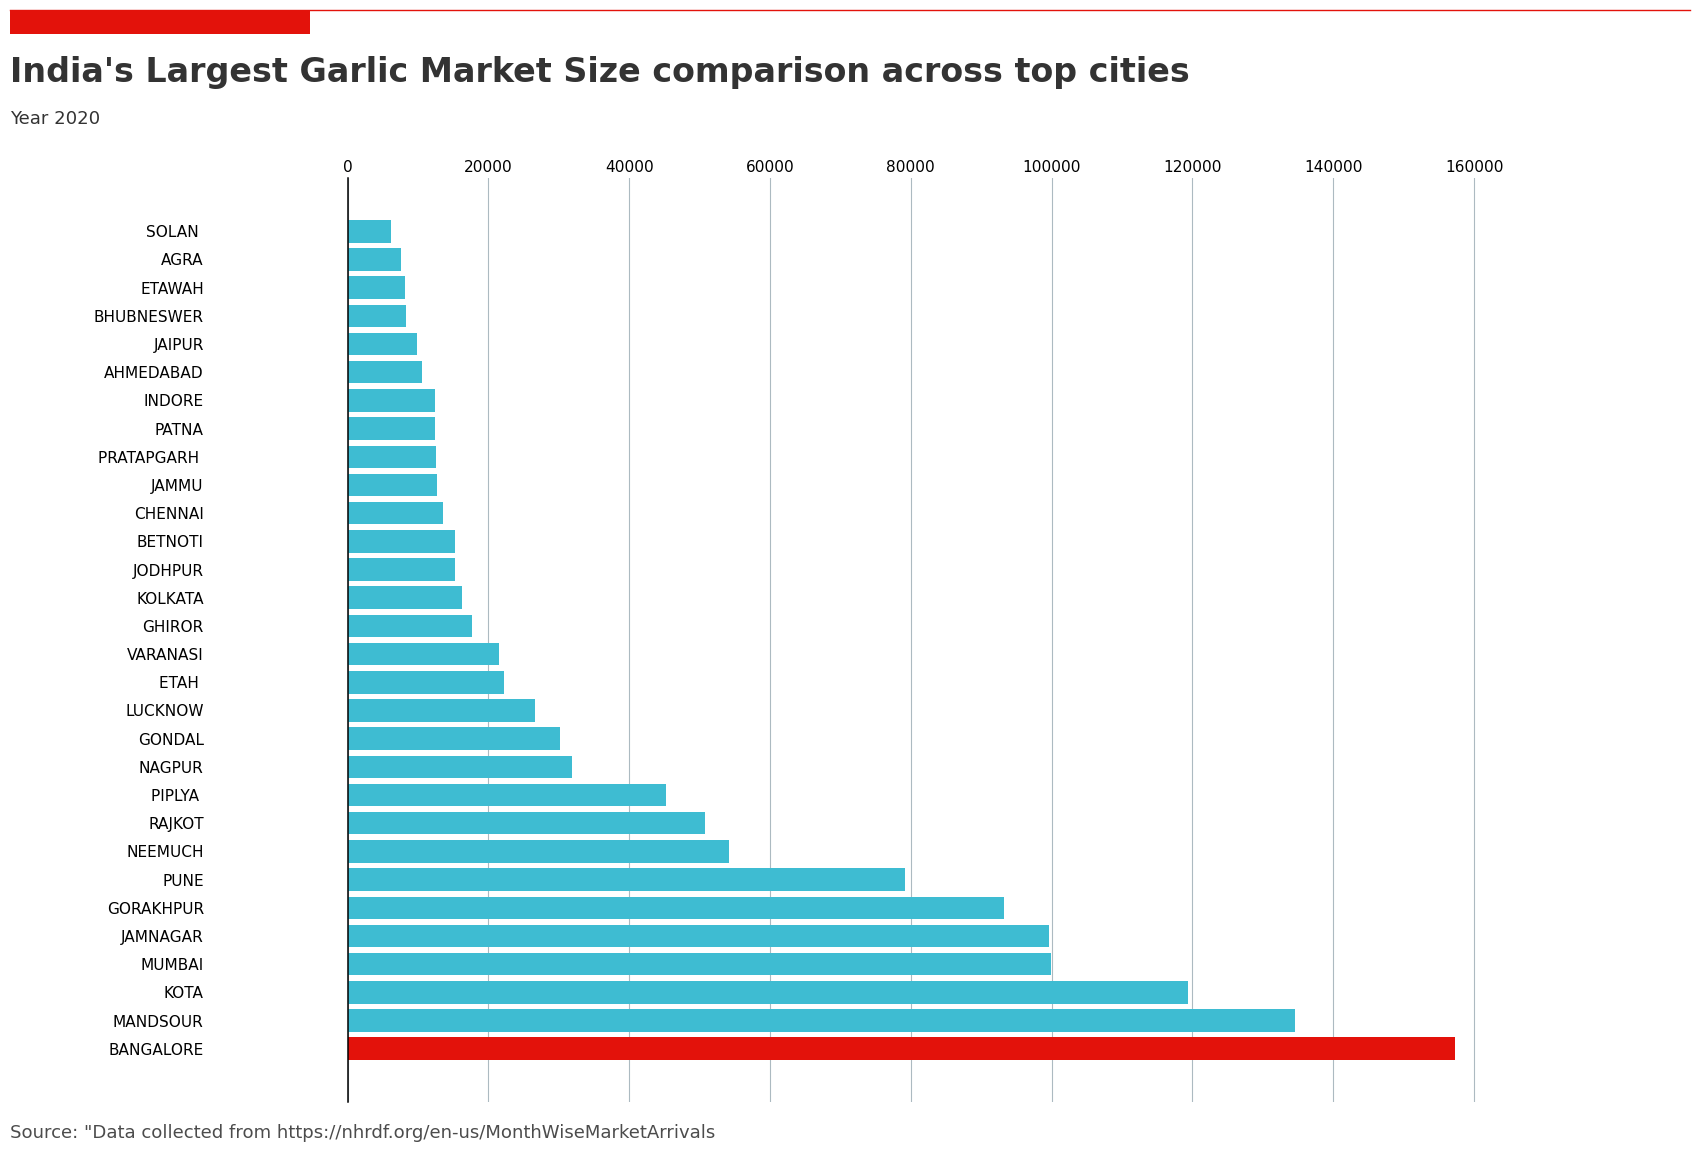

In [53]:
# Plot the Data
fig,ax = plt.subplots(figsize = (15,12))
ax.plot([-.1, 1.02],                 # Set width of line
    [1.02, 1.02],                # Set height of line
    transform=fig.transFigure,   # Set location relative to plot
    clip_on=False, 
    color='#E3120B', 
    linewidth=1)
ax.add_patch(plt.Rectangle((-.1,1.02),                # Set location of rectangle by lower left corder
                        0.20,                       # Width of rectangle
                        -0.02,                      # Height of rectangle. Negative so it goes down.
                        facecolor='#E3120B', 
                        transform=fig.transFigure, 
                        clip_on=False, 
                        linewidth = 2))
ax.yaxis.set_tick_params(pad=100,            # Pad tick labels so they don't go over y-axis
                         labelsize=11,       # Set label size
                         bottom=False)       # Set no ticks on bottom/left
ax.xaxis.set_tick_params(labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=11,       # Set tick label size
                         pad=-1)             # Lower tick labels a bit
ax.grid(which="major", axis='x', color='#758D99', alpha=0.6, zorder=1)

# Remove splines. Can be done one at a time or can slice with a list.
ax.spines[['top','right','bottom']].set_visible(False)

# Make left spine slightly thicker
ax.spines['left'].set_linewidth(1.1)
ax.spines['left'].set_linewidth(1.1)
    
plt.text(x=-.1, y=.96, s="India's Largest Garlic Market Size comparison across top cities", color='black',transform=fig.transFigure, ha='left', fontsize=24, weight='bold', alpha=.8)
plt.text(x=-.1, y=.925, s="Year 2020", transform=fig.transFigure, ha='left', fontsize=13, alpha=.8)
plt.text(x=-.1, y=.08, s="""Source: "Data collected from https://nhrdf.org/en-us/MonthWiseMarketArrivals""", transform=fig.transFigure, ha='left', fontsize=13, alpha=.7)
plt.barh(df2020_city.city[:30],df2020_city.quantity[:30], color='#3EBCD2', zorder=2)
plt.barh(df2020_city.city[:1],df2020_city.quantity[:1], color='#E3120B', zorder=2)
plt.show()

In [54]:
df_bang = df[df.city == "BANGALORE"]
df_bang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
782,BANGALORE,January,2005,33291,600,1505,1100,KNT,BANGALORE,2005-01-01
783,BANGALORE,January,2006,30963,900,1800,1250,KNT,BANGALORE,2006-01-01
784,BANGALORE,January,2007,14907,3763,7300,5444,KNT,BANGALORE,2007-01-01
785,BANGALORE,January,2008,20101,2500,5286,3893,KNT,BANGALORE,2008-01-01
786,BANGALORE,January,2009,25975,500,1400,1009,KNT,BANGALORE,2009-01-01


In [55]:
df_bang.describe()

,year,quantity,priceMin,priceMax,priceMod
count,203.000000,203.000000,203.000000,203.000000,203.000000
mean,2012.975369,31656.467980,3405.729064,5804.645320,4645.768473
std,4.916570,13629.935758,2497.908323,3559.575061,2996.376031
min,2005.000000,50.000000,338.000000,850.000000,625.000000
25%,2009.000000,24162.500000,1528.500000,3445.500000,2572.500000
50%,2013.000000,32510.000000,2825.000000,5125.000000,4017.000000
75%,2017.000000,40452.500000,4502.000000,7397.500000,5810.500000
max,2022.000000,79608.000000,11857.000000,18739.000000,15304.000000


In [56]:
# set the index as date
df_bang = df_bang.sort_values(by="date")
df_bang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
782,BANGALORE,January,2005,33291,600,1505,1100,KNT,BANGALORE,2005-01-01
800,BANGALORE,February,2005,33165,600,1500,1100,KNT,BANGALORE,2005-02-01
818,BANGALORE,March,2005,35360,566,1568,1168,KNT,BANGALORE,2005-03-01
835,BANGALORE,April,2005,41165,550,1603,1200,KNT,BANGALORE,2005-04-01
852,BANGALORE,May,2005,35527,543,1600,1196,KNT,BANGALORE,2005-05-01


In [57]:
# Set the Index for the Dataframe
df_bang.index = pd.PeriodIndex(df_bang.date, freq='M')
df_bang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
2005-01,BANGALORE,January,2005,33291,600,1505,1100,KNT,BANGALORE,2005-01-01
2005-02,BANGALORE,February,2005,33165,600,1500,1100,KNT,BANGALORE,2005-02-01
2005-03,BANGALORE,March,2005,35360,566,1568,1168,KNT,BANGALORE,2005-03-01
2005-04,BANGALORE,April,2005,41165,550,1603,1200,KNT,BANGALORE,2005-04-01
2005-05,BANGALORE,May,2005,35527,543,1600,1196,KNT,BANGALORE,2005-05-01


In [58]:
df_bang

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
2005-01,BANGALORE,January,2005,33291,600,1505,1100,KNT,BANGALORE,2005-01-01
2005-02,BANGALORE,February,2005,33165,600,1500,1100,KNT,BANGALORE,2005-02-01
2005-03,BANGALORE,March,2005,35360,566,1568,1168,KNT,BANGALORE,2005-03-01
2005-04,BANGALORE,April,2005,41165,550,1603,1200,KNT,BANGALORE,2005-04-01
2005-05,BANGALORE,May,2005,35527,543,1600,1196,KNT,BANGALORE,2005-05-01
...,...,...,...,...,...,...,...,...,...,...
2021-11,BANGALORE,November,2021,5920,3000,7500,5250,KNT,BANGALORE,2021-11-01
2021-12,BANGALORE,December,2021,10750,3667,6833,5250,KNT,BANGALORE,2021-12-01
2022-01,BANGALORE,January,2022,5590,5250,6250,5750,KNT,BANGALORE,2022-01-01


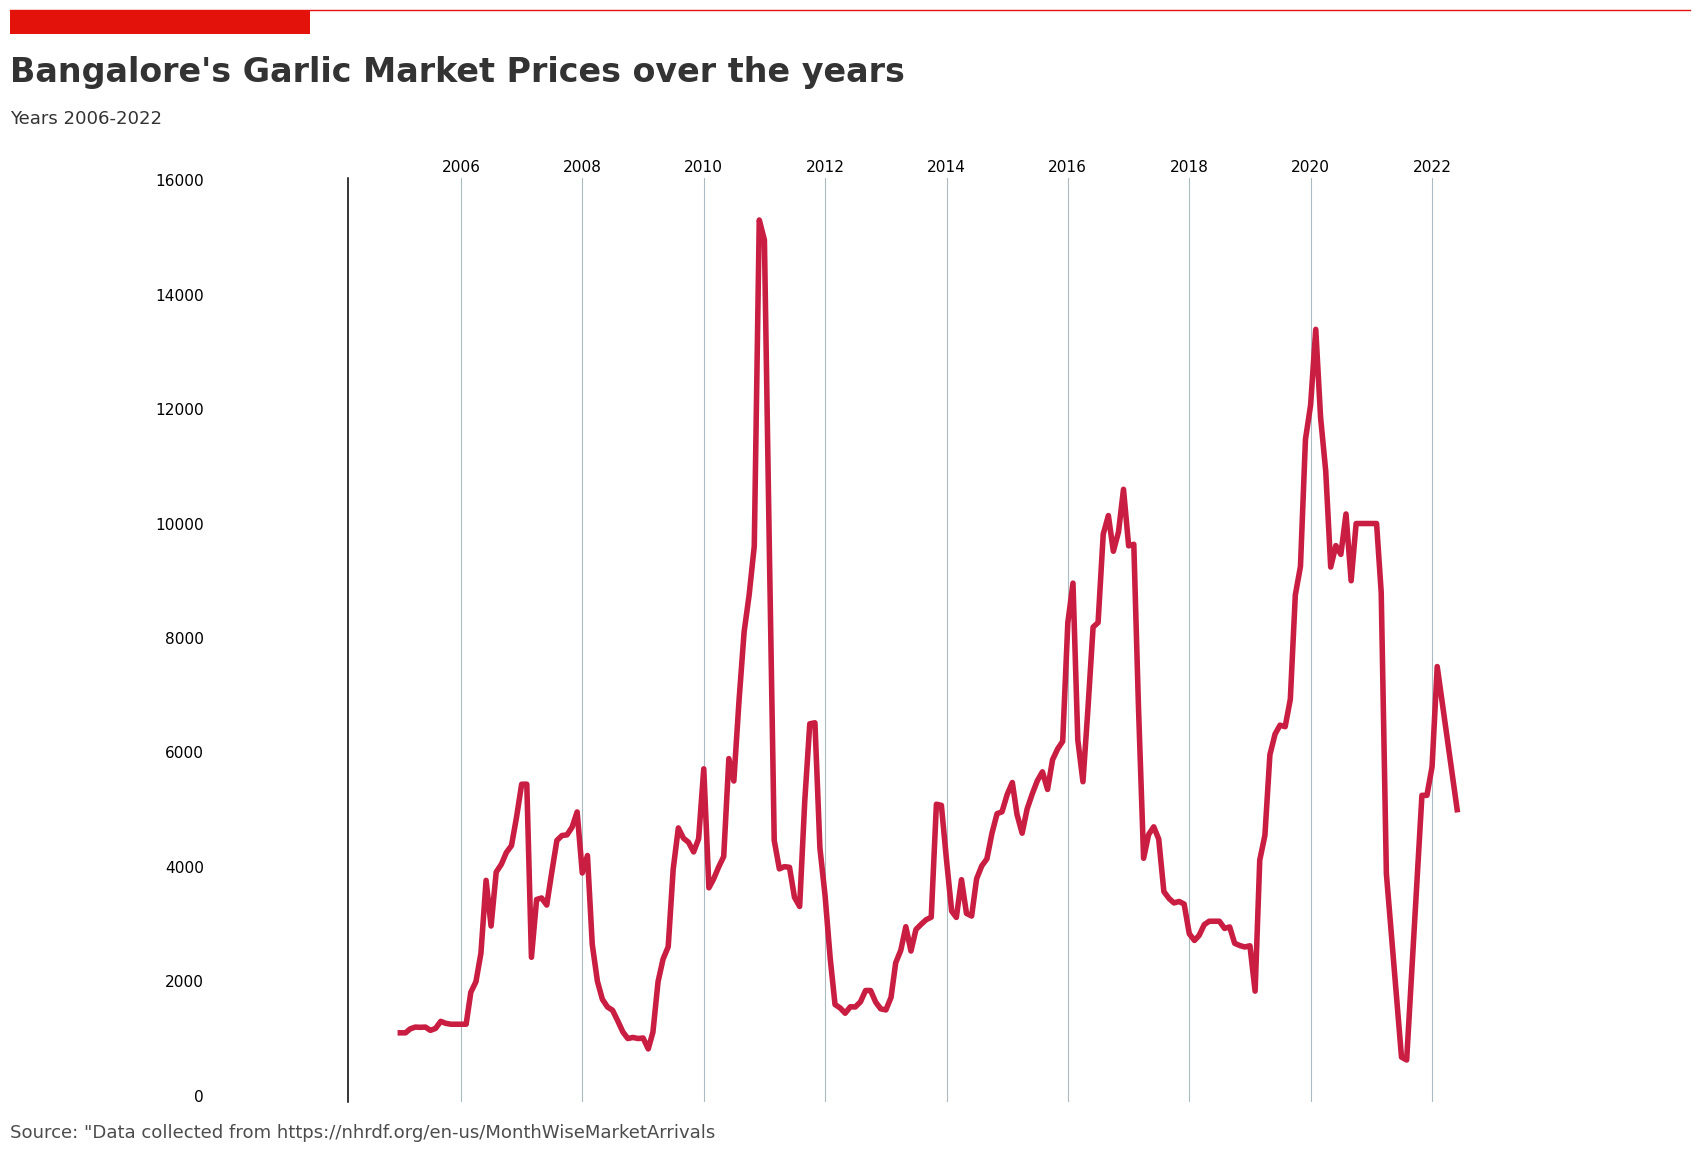

In [59]:
# Plot the Data
fig,ax = plt.subplots(figsize = (15,12))
ax.plot([-.1, 1.02],                 # Set width of line
    [1.02, 1.02],                # Set height of line
    transform=fig.transFigure,   # Set location relative to plot
    clip_on=False, 
    color='#E3120B', 
    linewidth=1)
ax.add_patch(plt.Rectangle((-.1,1.02),                # Set location of rectangle by lower left corder
                        0.20,                       # Width of rectangle
                        -0.02,                      # Height of rectangle. Negative so it goes down.
                        facecolor='#E3120B', 
                        transform=fig.transFigure, 
                        clip_on=False, 
                        linewidth = 2))
ax.yaxis.set_tick_params(pad=100,            # Pad tick labels so they don't go over y-axis
                         labelsize=11,       # Set label size
                         bottom=False)       # Set no ticks on bottom/left
ax.xaxis.set_tick_params(labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=11,       # Set tick label size
                         pad=-1)             # Lower tick labels a bit
ax.grid(which="major", axis='x', color='#758D99', alpha=0.6, zorder=1)

# Remove splines. Can be done one at a time or can slice with a list.
ax.spines[['top','right','bottom']].set_visible(False)

# Make left spine slightly thicker
ax.spines['left'].set_linewidth(1.1)
ax.spines['left'].set_linewidth(1.1)
    
plt.text(x=-.1, y=.96, s="Bangalore's Garlic Market Prices over the years", color='black',transform=fig.transFigure, ha='left', fontsize=24, weight='bold', alpha=.8)
plt.text(x=-.1, y=.925, s="Years 2006-2022", transform=fig.transFigure, ha='left', fontsize=13, alpha=.8)
plt.text(x=-.1, y=.08, s="""Source: "Data collected from https://nhrdf.org/en-us/MonthWiseMarketArrivals""", transform=fig.transFigure, ha='left', fontsize=13, alpha=.7)
plt.plot(df_bang.date,df_bang.priceMod, color='#C91D42',linewidth=4)
# df_bang.priceMod.plot()
plt.show()

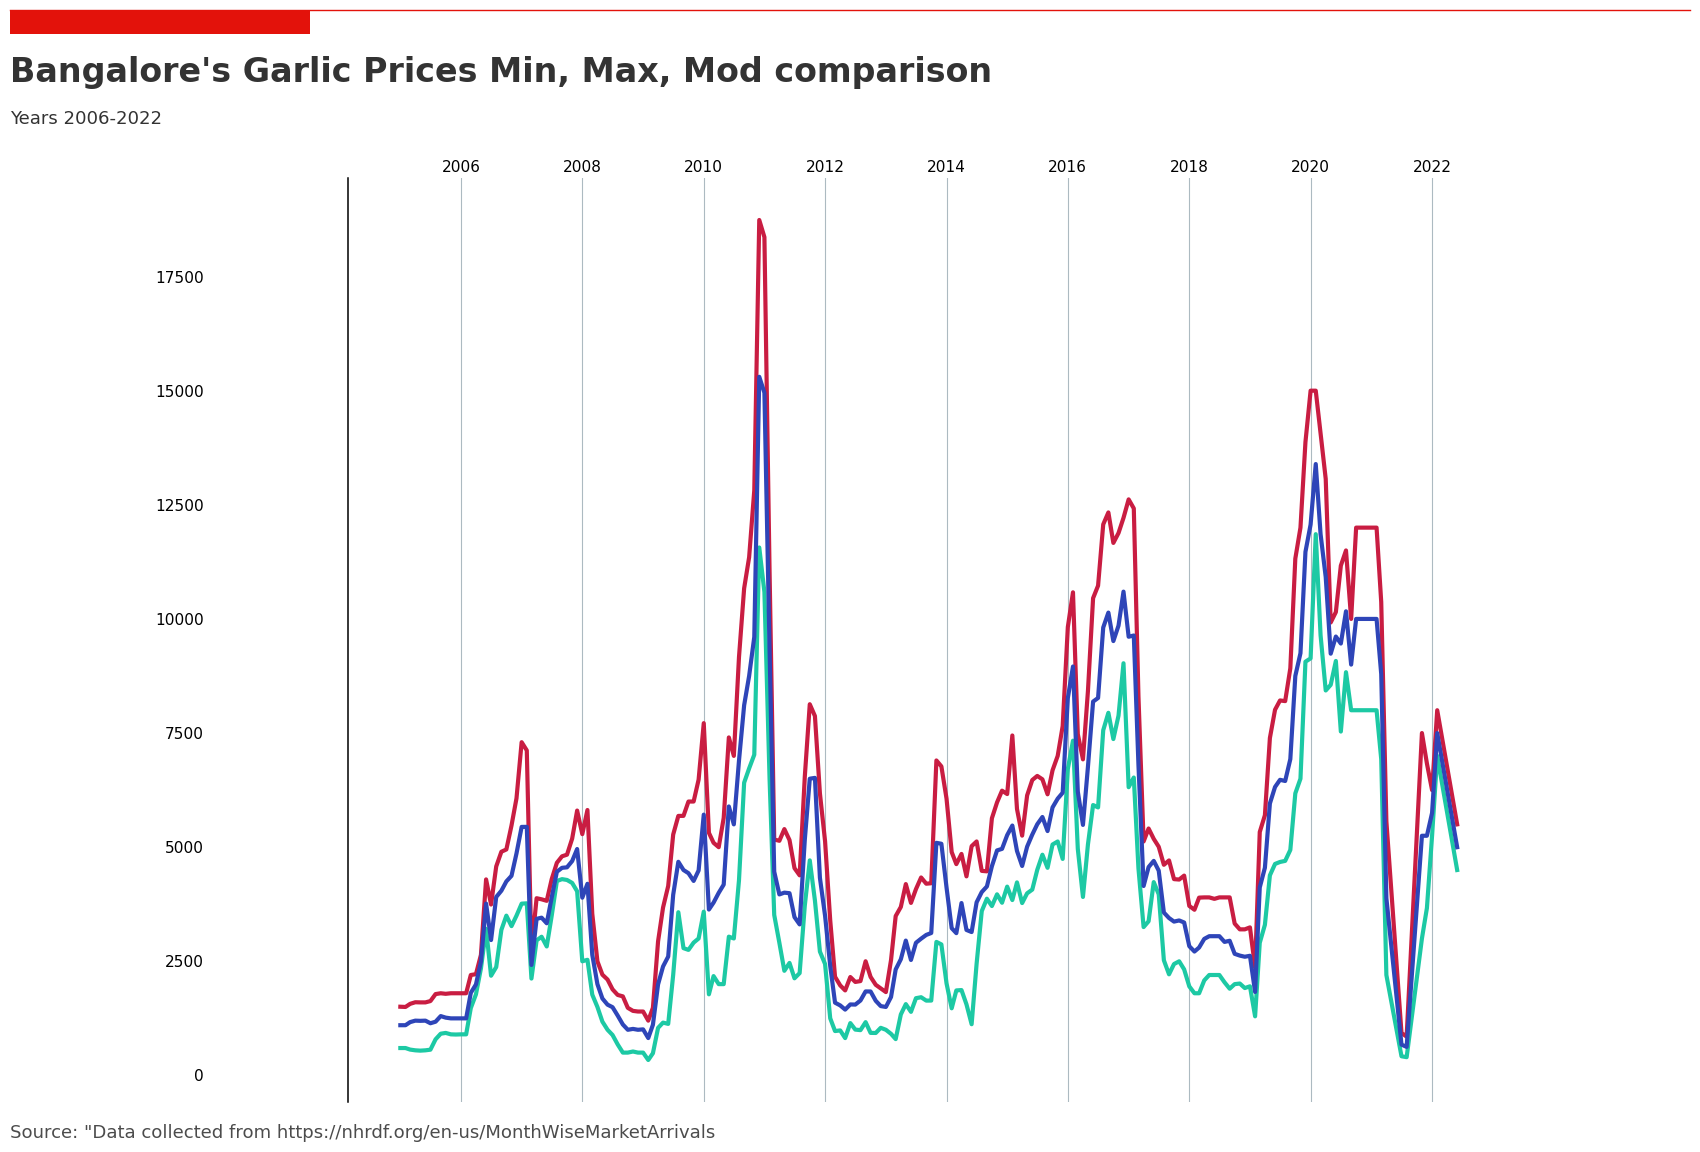

In [60]:
# Plot the Data
fig,ax = plt.subplots(figsize = (15,12))
ax.plot([-.1, 1.02],                 # Set width of line
    [1.02, 1.02],                # Set height of line
    transform=fig.transFigure,   # Set location relative to plot
    clip_on=False, 
    color='#E3120B', 
    linewidth=1)
ax.add_patch(plt.Rectangle((-.1,1.02),                # Set location of rectangle by lower left corder
                        0.20,                       # Width of rectangle
                        -0.02,                      # Height of rectangle. Negative so it goes down.
                        facecolor='#E3120B', 
                        transform=fig.transFigure, 
                        clip_on=False, 
                        linewidth = 2))
ax.yaxis.set_tick_params(pad=100,            # Pad tick labels so they don't go over y-axis
                         labelsize=11,       # Set label size
                         bottom=False)       # Set no ticks on bottom/left
ax.xaxis.set_tick_params(labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=11,       # Set tick label size
                         pad=-1)             # Lower tick labels a bit
ax.grid(which="major", axis='x', color='#758D99', alpha=0.6, zorder=1)

# Remove splines. Can be done one at a time or can slice with a list.
ax.spines[['top','right','bottom']].set_visible(False)

# Make left spine slightly thicker
ax.spines['left'].set_linewidth(1.1)
ax.spines['left'].set_linewidth(1.1)
    
plt.text(x=-.1, y=.96, s="Bangalore's Garlic Prices Min, Max, Mod comparison", color='black',transform=fig.transFigure, ha='left', fontsize=24, weight='bold', alpha=.8)
plt.text(x=-.1, y=.925, s="Years 2006-2022", transform=fig.transFigure, ha='left', fontsize=13, alpha=.8)
plt.text(x=-.1, y=.08, s="""Source: "Data collected from https://nhrdf.org/en-us/MonthWiseMarketArrivals""", transform=fig.transFigure, ha='left', fontsize=13, alpha=.7)
plt.plot(df_bang.date,df_bang['priceMin'],color='#1DC9A4',linewidth=3)
plt.plot(df_bang.date,df_bang['priceMax'],color='#C91D42',linewidth=3)
plt.plot(df_bang.date,df_bang['priceMod'],color='#2E45B8',linewidth=3)
plt.show()

In [61]:
df_bang["priceDiff"] = df_bang["priceMax"] - df_bang["priceMin"]
df_bang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date,priceDiff
date,,,,,,,,,,,
2005-01,BANGALORE,January,2005,33291,600,1505,1100,KNT,BANGALORE,2005-01-01,905
2005-02,BANGALORE,February,2005,33165,600,1500,1100,KNT,BANGALORE,2005-02-01,900
2005-03,BANGALORE,March,2005,35360,566,1568,1168,KNT,BANGALORE,2005-03-01,1002
2005-04,BANGALORE,April,2005,41165,550,1603,1200,KNT,BANGALORE,2005-04-01,1053
2005-05,BANGALORE,May,2005,35527,543,1600,1196,KNT,BANGALORE,2005-05-01,1057


In [62]:
# a new column for the intger month
df_bang["monthVal"] = pd.DatetimeIndex(df_bang["date"]).month
df_bang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date,priceDiff,monthVal
date,,,,,,,,,,,,
2005-01,BANGALORE,January,2005,33291,600,1505,1100,KNT,BANGALORE,2005-01-01,905,1
2005-02,BANGALORE,February,2005,33165,600,1500,1100,KNT,BANGALORE,2005-02-01,900,2
2005-03,BANGALORE,March,2005,35360,566,1568,1168,KNT,BANGALORE,2005-03-01,1002,3
2005-04,BANGALORE,April,2005,41165,550,1603,1200,KNT,BANGALORE,2005-04-01,1053,4
2005-05,BANGALORE,May,2005,35527,543,1600,1196,KNT,BANGALORE,2005-05-01,1057,5


In [63]:
df_bangPivot = pd.pivot_table(df_bang, values = "priceDiff", 
                             columns = "year", index = "monthVal")
df_bangPivot

year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
monthVal,,,,,,,,,,,,,,,,,,
1,905.0,900.0,3537.0,2786.0,900.0,4130.0,7773.0,2691.0,826.0,4047.0,2028.0,3109.0,6305.0,1763.0,1291.0,5864.0,4000.0,1000.0
2,900.0,900.0,3350.0,3281.0,862.0,3537.0,4545.0,2148.0,1616.0,3423.0,3605.0,3250.0,5895.0,1829.0,1068.0,3143.0,4000.0,1000.0
3,1002.0,725.0,608.0,1773.0,996.0,2920.0,1652.0,1189.0,2695.0,2767.0,1609.0,2514.0,3769.0,2095.0,2427.0,4428.0,3442.0,NaN
4,1053.0,442.0,923.0,1000.0,1895.0,3000.0,2235.0,987.0,2355.0,2982.0,1477.0,3014.0,1875.0,1818.0,2400.0,4634.0,3367.0,NaN
5,1057.0,296.0,820.0,1029.0,2521.0,3640.0,3104.0,1044.0,2630.0,2804.0,2145.0,3360.0,2032.0,1700.0,3008.0,1366.0,NaN,NaN
6,1050.0,1082.0,1000.0,1100.0,3021.0,4364.0,2692.0,1010.0,2386.0,3900.0,2400.0,4532.0,947.0,1668.0,3378.0,1071.0,NaN,1000.0
7,1065.0,1560.0,800.0,1000.0,3073.0,4000.0,2413.0,1044.0,2389.0,2679.0,2057.0,4858.0,1041.0,1700.0,3538.0,3634.0,510.0,NaN
8,991.0,2204.0,400.0,1084.0,2110.0,4888.0,2141.0,1075.0,2623.0,881.0,1652.0,4509.0,2091.0,1860.0,3500.0,2667.0,450.0,NaN
9,886.0,1712.0,500.0,1232.0,2898.0,4257.0,2825.0,1334.0,2561.0,600.0,1610.0,4389.0,2495.0,2000.0,3980.0,2000.0,NaN,NaN


# <font color=red><center> Year wise comparison </center></font>

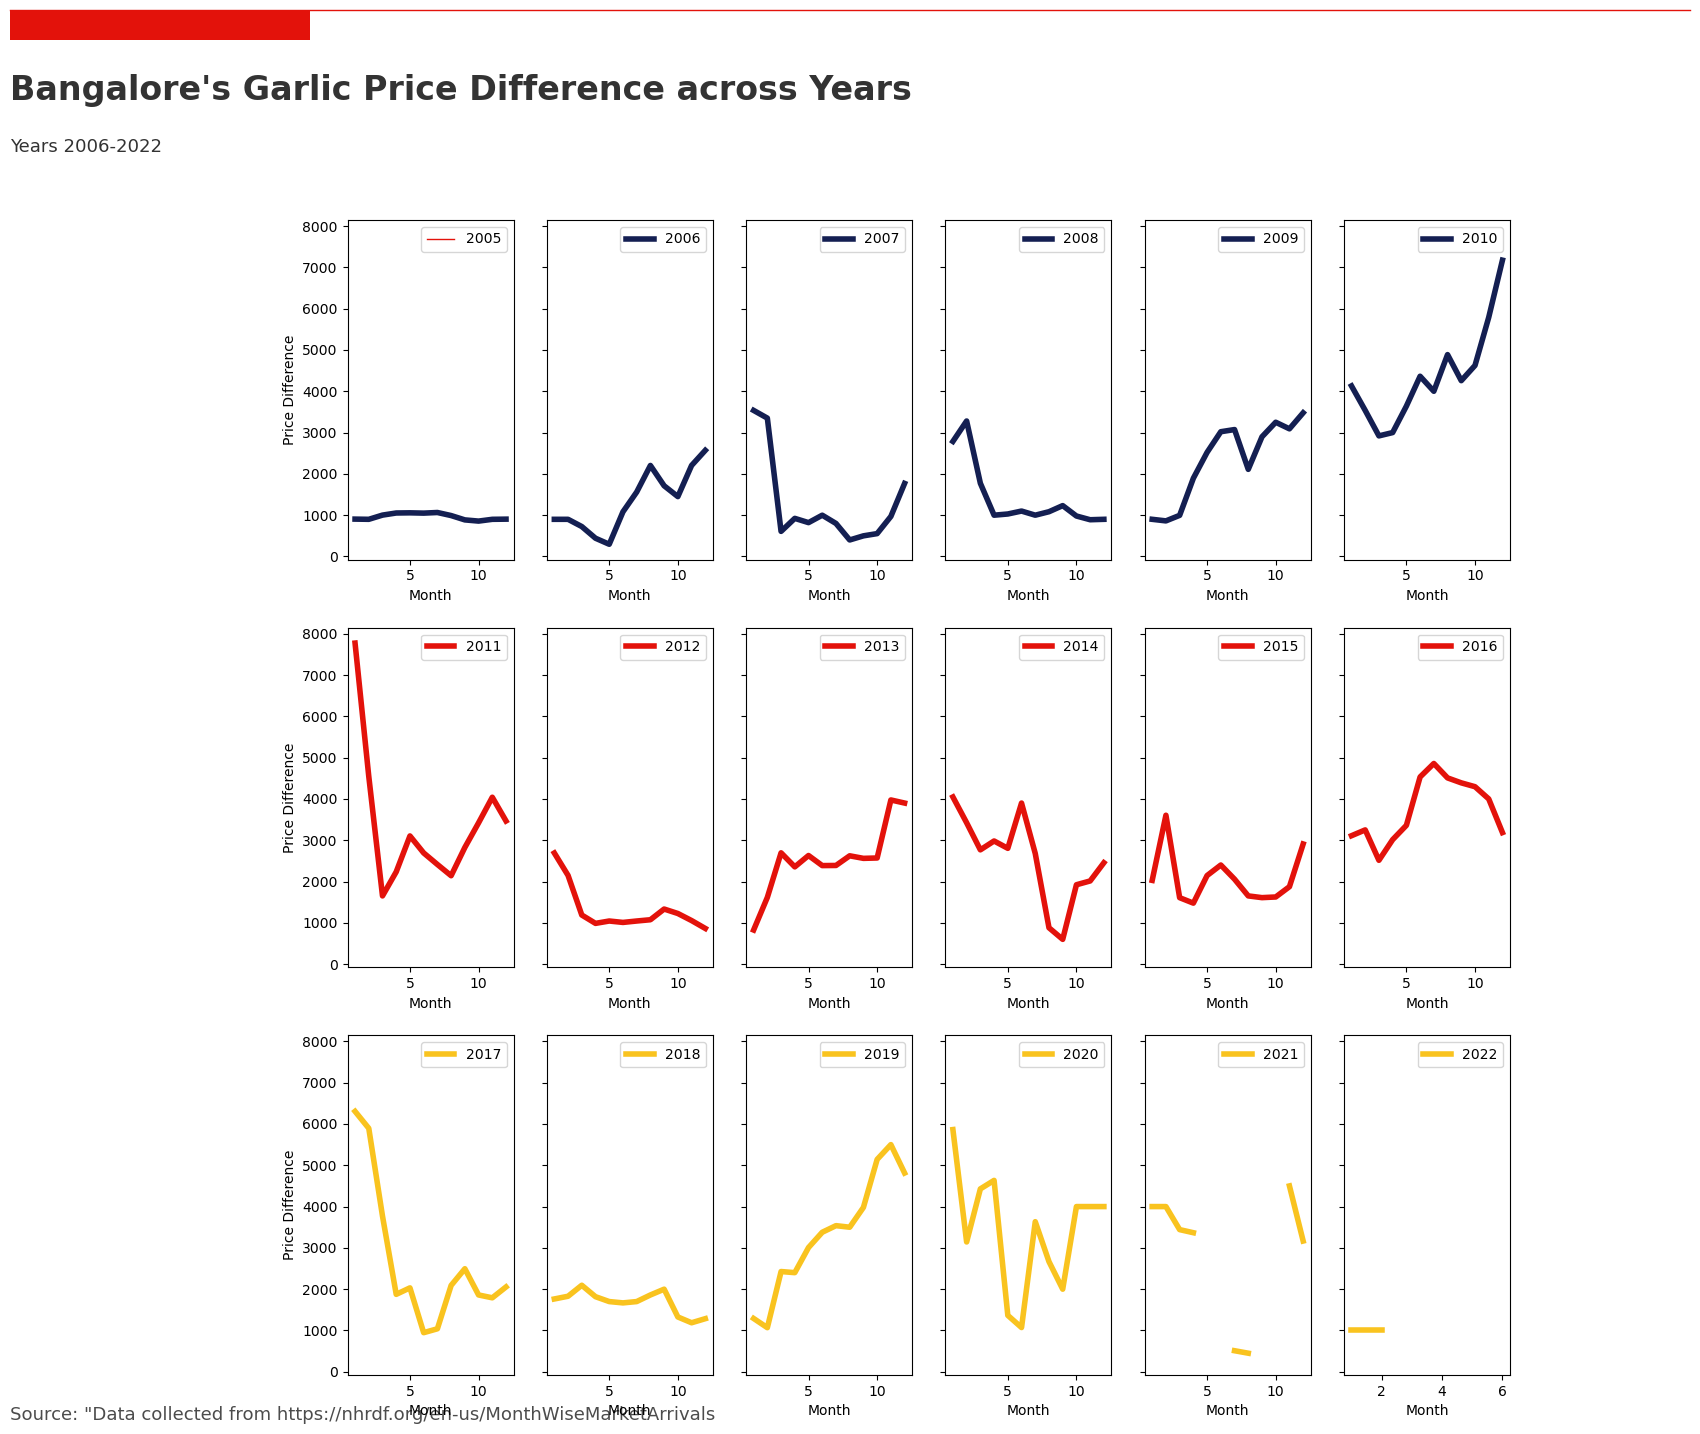

In [64]:
# Plot the Data
fig,ax = plt.subplots(nrows=3,ncols= 6,figsize = (15,15), sharey=True)
ax[0,0].plot([-.1, 1.02],                 # Set width of line
    [1.02, 1.02],                # Set height of line
    transform=fig.transFigure,   # Set location relative to plot
    clip_on=False, 
    color='#E3120B', 
    linewidth=1)
ax[0][0].add_patch(plt.Rectangle((-.1,1.02),                # Set location of rectangle by lower left corder
                        0.20,                       # Width of rectangle
                        -0.02,                      # Height of rectangle. Negative so it goes down.
                        facecolor='#E3120B', 
                        transform=fig.transFigure, 
                        clip_on=False, 
                        linewidth = 2))
    
plt.text(x=-.1, y=.96, s="Bangalore's Garlic Price Difference across Years",color='black',transform=fig.transFigure, ha='left', fontsize=24, weight='bold', alpha=.8)
plt.text(x=-.1, y=.925, s="Years 2006-2022", transform=fig.transFigure, ha='left', fontsize=13, alpha=.8)
plt.text(x=-.1, y=.08, s="""Source: "Data collected from https://nhrdf.org/en-us/MonthWiseMarketArrivals""", transform=fig.transFigure, ha='left', fontsize=13, alpha=.7)
labels = ["2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021","2022"]
j=0
for row in range(3):
    for col in range(6):
        index=row+1*col+1+5*row
        if row==0:
            color="#141F52"
        elif row == 1:
            color="#E3120B"
        elif row ==2:
            color="#F9C31F"
        ax[row][col].plot(df_bangPivot.iloc[:,index-1],linewidth=4,color=color)
        ax[row][col].set_xlabel('Month')
        ax[row][0].set_ylabel('Price Difference')
        ax[row][col].legend([labels[j]])
        j+=1
plt.show()
# label="{} data".format(i)

# <font color=red><center> Moving Average </center></font>

In [65]:
from sklearn.metrics import (mean_absolute_error, mean_squared_error,
                             mean_squared_log_error, median_absolute_error,
                             r2_score)


def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [66]:
def plotMovingAverage(
    series, window, plot_intervals=False, scale=1.96, plot_anomalies=False
):

    """
        series - dataframe with timeseries
        window - rolling window size
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies

    """
    rolling_mean = series.rolling(window=window).mean()

    fig,ax = plt.subplots(figsize = (10,8))

    ax.plot([-.1, 1.02],                 # Set width of line
        [1.02, 1.02],                # Set height of line
        transform=fig.transFigure,   # Set location relative to plot
        clip_on=False, 
        color='#E3120B', 
        linewidth=1)
    ax.add_patch(plt.Rectangle((-.1,1.02),                # Set location of rectangle by lower left corder
                            0.20,                       # Width of rectangle
                            -0.02,                      # Height of rectangle. Negative so it goes down.
                            facecolor='#E3120B', 
                            transform=fig.transFigure, 
                            clip_on=False, 
                            linewidth = 2))
    ax.yaxis.set_tick_params(pad=100,            # Pad tick labels so they don't go over y-axis
                             labelsize=11,       # Set label size
                             bottom=False)       # Set no ticks on bottom/left
    ax.xaxis.set_tick_params(labeltop=True,      # Put x-axis labels on top
                             labelbottom=False,  # Set no x-axis labels on bottom
                             bottom=False,       # Set no ticks on bottom
                             labelsize=11,       # Set tick label size
                             pad=-1)             # Lower tick labels a bit
    ax.grid(which="major", axis='x', color='#758D99', alpha=0.6, zorder=1)

    # Remove splines. Can be done one at a time or can slice with a list.
    ax.spines[['top','right','bottom']].set_visible(False)

    # Make left spine slightly thicker
    ax.spines['left'].set_linewidth(1.1)
    ax.spines['left'].set_linewidth(1.1)

    plt.text(x=-.1, y=.96, s="Bangalore's Garlic Modal Prices and Moving Average ", color='black',transform=fig.transFigure, ha='left', fontsize=18, weight='bold', alpha=.8)
    plt.text(x=-.1, y=.925, s="Years 2006-2022, window size = {}".format(window), transform=fig.transFigure, ha='left', fontsize=10, alpha=.8)
    plt.text(x=-.1, y=.08, s="""Source: "Data collected from https://nhrdf.org/en-us/MonthWiseMarketArrivals""", transform=fig.transFigure, ha='left', fontsize=13, alpha=.7)

    plt.plot(rolling_mean, "#1DC9A4", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "#E3120B", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "#E3120B")

        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series < lower_bond] = series[series < lower_bond]
            anomalies[series > upper_bond] = series[series > upper_bond]
            plt.plot(anomalies, "ro", markersize=10)

    plt.plot(series[window:], "#1F2E7A",label="Actual values")
    plt.legend(loc="upper left")
#     plt.grid(True)

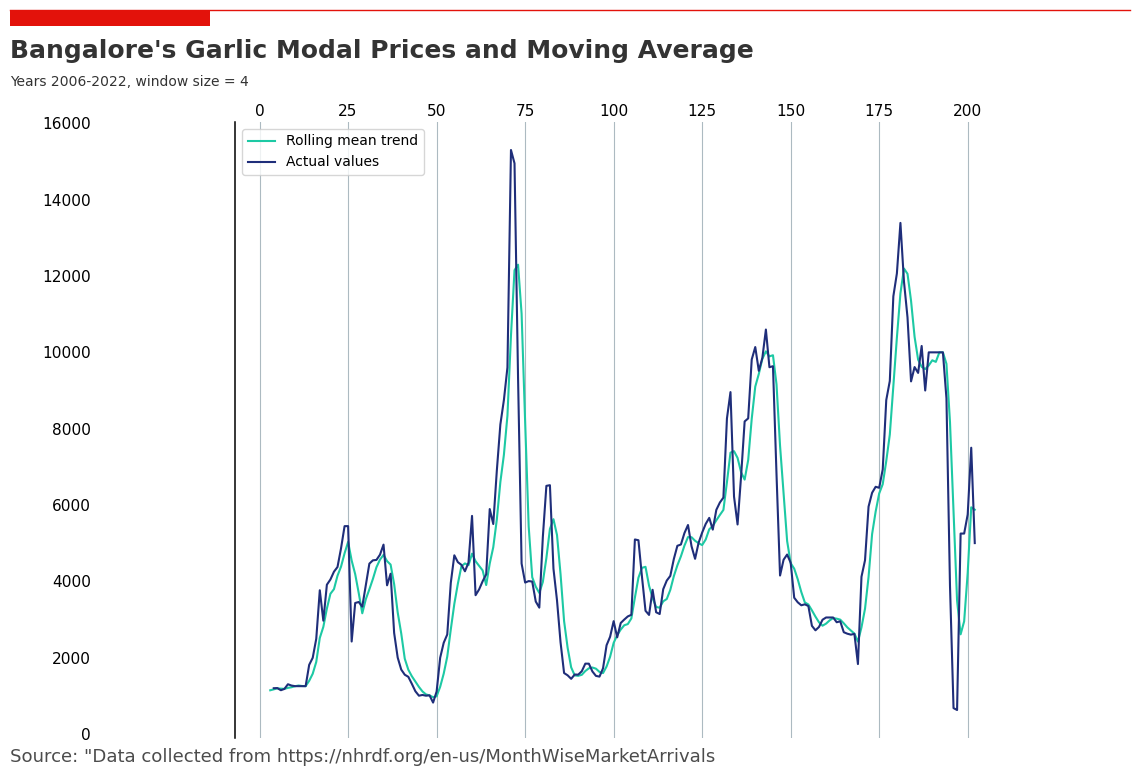

In [67]:
plotMovingAverage(df_bang['priceMod'].reset_index(drop=True), 4)

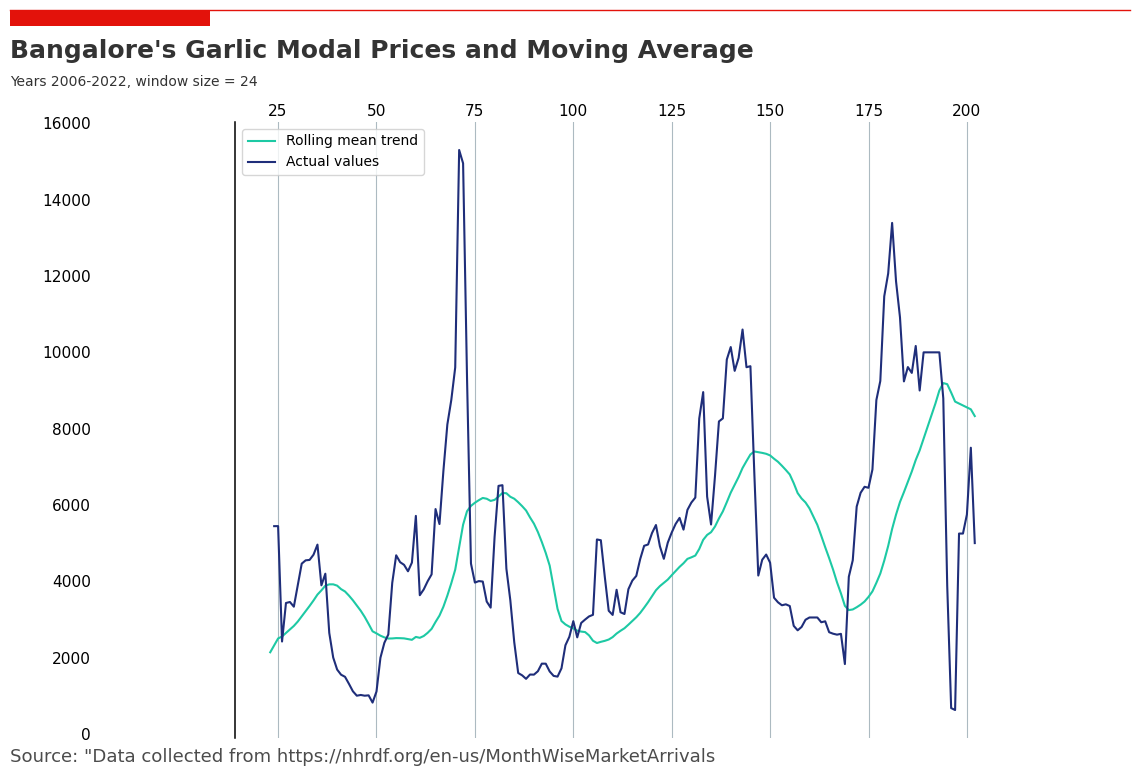

In [68]:
plotMovingAverage(df_bang['priceMod'].reset_index(drop=True), 24)

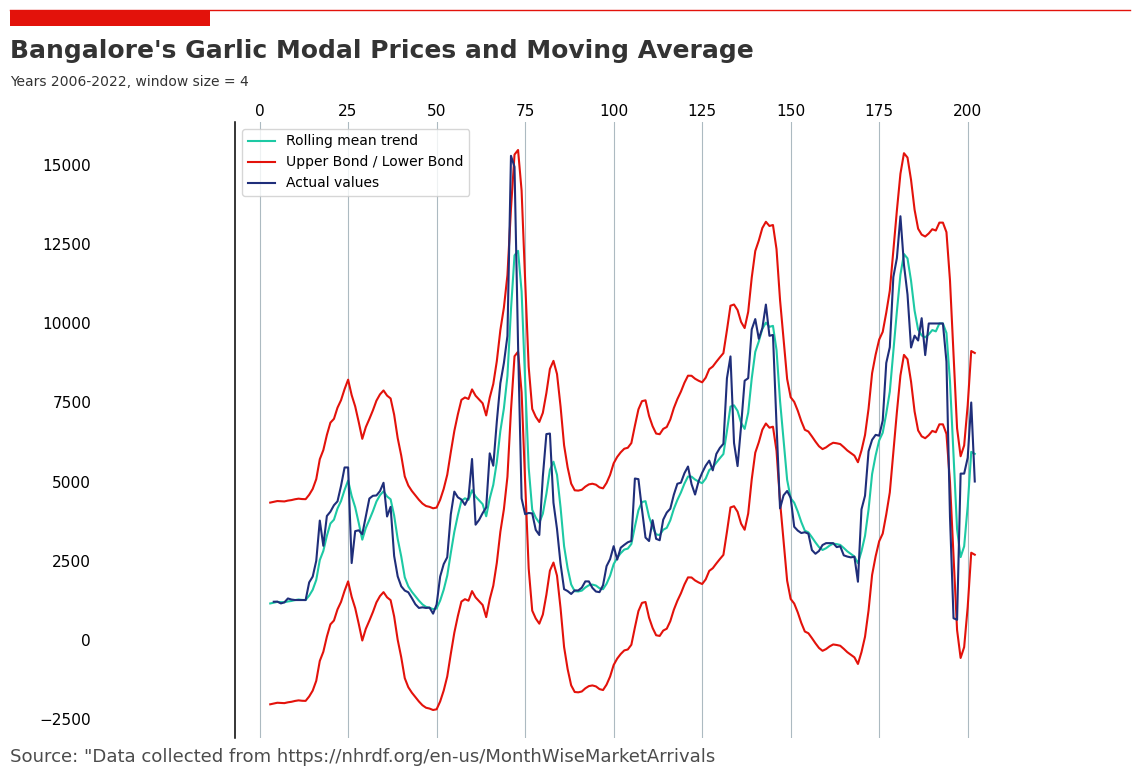

In [69]:
# plotMovingAverage(ads, 4, 
plotMovingAverage(df_bang['priceMod'].reset_index(drop=True), 4,plot_intervals=True)

## <font color=red><center> Weighted Average </center></font>

In [70]:
def weighted_average(series, weights):
    """
        Calculate weighted average on the series.
        Assuming weights are sorted in descending order
        (larger weights are assigned to more recent observations).
    """
    result = 0.0
    for n in range(len(weights)):
        result += series.iloc[-n - 1] * weights[n]
    return float(result)

In [71]:
weighted_average(df_bang['priceMod'].reset_index(drop=True), [0.6, 0.3, 0.1])

5825.0

# <font color=red><center> Exponential Smoothing </center></font>

In [72]:
def exponential_smoothing(series, alpha):
    """
        series - dataset with timestamps
        alpha - float [0.0, 1.0], smoothing parameter
    """
    result = [series[0]]  # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n - 1])
    return result

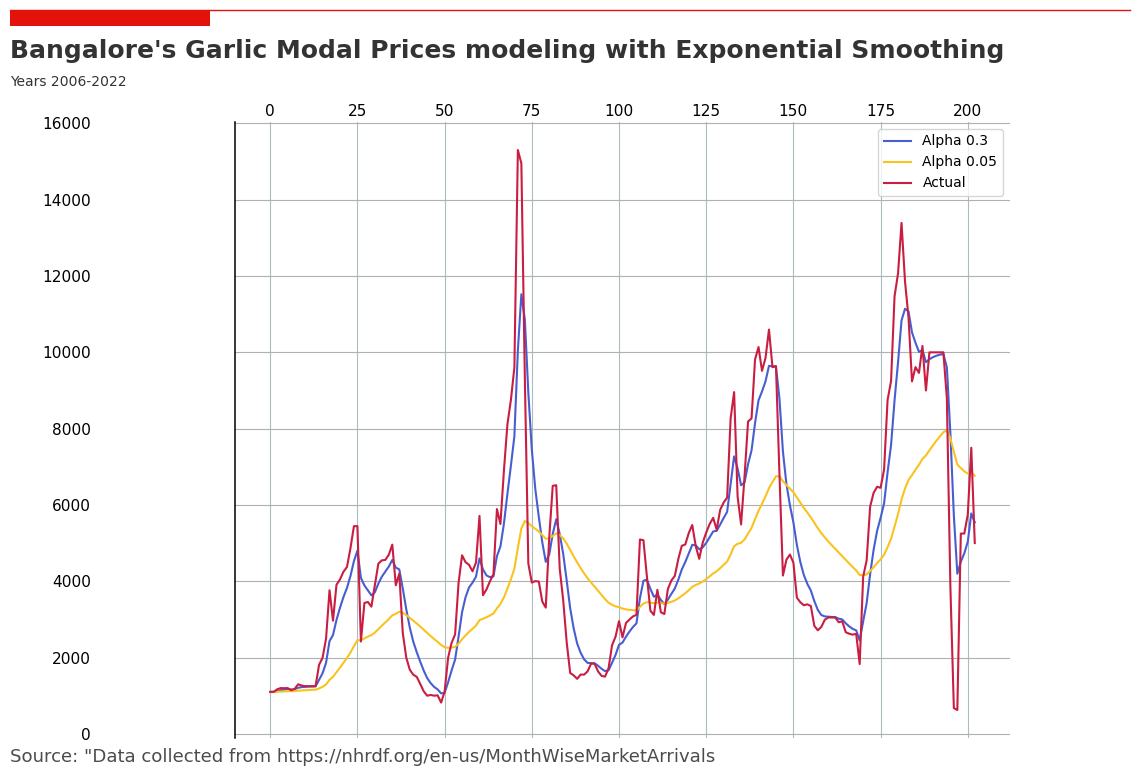

In [73]:
def plotExponentialSmoothing(series, alphas):
    """
        Plots exponential smoothing with different alphas

        series - dataset with timestamps
        alphas - list of floats, smoothing parameters

    """
#     with plt.style.context("seaborn-white"):
    fig,ax = plt.subplots(figsize = (10,8))

    ax.plot([-.1, 1.02],                 # Set width of line
        [1.02, 1.02],                # Set height of line
        transform=fig.transFigure,   # Set location relative to plot
        clip_on=False, 
        color='#E3120B', 
        linewidth=1)
    ax.add_patch(plt.Rectangle((-.1,1.02),                # Set location of rectangle by lower left corder
                            0.20,                       # Width of rectangle
                            -0.02,                      # Height of rectangle. Negative so it goes down.
                            facecolor='#E3120B', 
                            transform=fig.transFigure, 
                            clip_on=False, 
                            linewidth = 2))
    ax.yaxis.set_tick_params(pad=100,            # Pad tick labels so they don't go over y-axis
                             labelsize=11,       # Set label size
                             bottom=False)       # Set no ticks on bottom/left
    ax.xaxis.set_tick_params(labeltop=True,      # Put x-axis labels on top
                             labelbottom=False,  # Set no x-axis labels on bottom
                             bottom=False,       # Set no ticks on bottom
                             labelsize=11,       # Set tick label size
                             pad=-1)             # Lower tick labels a bit
    ax.grid(which="major", axis='x', color='#758D99', alpha=0.6, zorder=1)

    # Remove splines. Can be done one at a time or can slice with a list.
    ax.spines[['top','right','bottom']].set_visible(False)

    # Make left spine slightly thicker
    ax.spines['left'].set_linewidth(1.1)
    ax.spines['left'].set_linewidth(1.1)

    plt.text(x=-.1, y=.96, s="Bangalore's Garlic Modal Prices modeling with Exponential Smoothing ", color='black',transform=fig.transFigure, ha='left', fontsize=18, weight='bold', alpha=.8)
    plt.text(x=-.1, y=.925, s="Years 2006-2022", transform=fig.transFigure, ha='left', fontsize=10, alpha=.8)
    plt.text(x=-.1, y=.08, s="""Source: "Data collected from https://nhrdf.org/en-us/MonthWiseMarketArrivals""", transform=fig.transFigure, ha='left', fontsize=13, alpha=.7)


#     plt.figure(figsize=(15, 7))
    for alpha in alphas:
        if alpha ==0.3:
            color='#475ED1'
        elif alpha == 0.05:
            color='#F9C31F'
        plt.plot(exponential_smoothing(series, alpha), color=color,label="Alpha {}".format(alpha))
    plt.plot(series.values, "#C91D42", label="Actual")
    plt.legend(loc="best")
    plt.axis("tight")
    plt.grid(True);
plotExponentialSmoothing(df_bang['priceMod'].reset_index(drop=True), [0.3, 0.05])

# <font color=red><center> Double Exponential Smoothing </center></font>

In [74]:
def double_exponential_smoothing(series, alpha, beta):
    """
        series - dataset with timeseries
        alpha - float [0.0, 1.0], smoothing parameter for level
        beta - float [0.0, 1.0], smoothing parameter for trend
    """
    # first value is same as series
    result = [series[0]]
    for n in range(1, len(series) + 1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series):  # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
    return result


def plotDoubleExponentialSmoothing(series, alphas, betas):
    """
        Plots double exponential smoothing with different alphas and betas

        series - dataset with timestamps
        alphas - list of floats, smoothing parameters for level
        betas - list of floats, smoothing parameters for trend
    """

#     with plt.style.context("seaborn-white"):
    fig,ax = plt.subplots(figsize = (10,8))

    ax.plot([-.1, 1.02],                 # Set width of line
        [1.02, 1.02],                # Set height of line
        transform=fig.transFigure,   # Set location relative to plot
        clip_on=False, 
        color='#E3120B', 
        linewidth=1)
    ax.add_patch(plt.Rectangle((-.1,1.02),                # Set location of rectangle by lower left corder
                            0.20,                       # Width of rectangle
                            -0.02,                      # Height of rectangle. Negative so it goes down.
                            facecolor='#E3120B', 
                            transform=fig.transFigure, 
                            clip_on=False, 
                            linewidth = 2))
    ax.yaxis.set_tick_params(pad=100,            # Pad tick labels so they don't go over y-axis
                             labelsize=11,       # Set label size
                             bottom=False)       # Set no ticks on bottom/left
    ax.xaxis.set_tick_params(labeltop=True,      # Put x-axis labels on top
                             labelbottom=False,  # Set no x-axis labels on bottom
                             bottom=False,       # Set no ticks on bottom
                             labelsize=11,       # Set tick label size
                             pad=-1)             # Lower tick labels a bit
    ax.grid(which="major", axis='x', color='#758D99', alpha=0.6, zorder=1)

    # Remove splines. Can be done one at a time or can slice with a list.
    ax.spines[['top','right','bottom']].set_visible(False)

    # Make left spine slightly thicker
    ax.spines['left'].set_linewidth(1.1)
    ax.spines['left'].set_linewidth(1.1)

    plt.text(x=-.1, y=.96, s="Bangalore's Garlic Modal Prices modeling with Double Exponential Smoothing ", color='black',transform=fig.transFigure, ha='left', fontsize=18, weight='bold', alpha=.8)
    plt.text(x=-.1, y=.925, s="Years 2006-2022", transform=fig.transFigure, ha='left', fontsize=10, alpha=.8)
    plt.text(x=-.1, y=.08, s="""Source: "Data collected from https://nhrdf.org/en-us/MonthWiseMarketArrivals""", transform=fig.transFigure, ha='left', fontsize=13, alpha=.7)

    
#     plt.figure(figsize=(20, 8))
    for alpha in alphas:
        for beta in betas:
            if alpha == 0.9:
                color='#475ED1'
            elif alpha == 0.02:
                color='#F9C31F'
            plt.plot(
                double_exponential_smoothing(series, alpha, beta),color=color,  label="Alpha {}, beta {}".format(alpha, beta),
            )
    plt.plot(series.values, color="#0D0D0D",label="Actual")
    plt.legend(loc="best")
    plt.axis("tight")


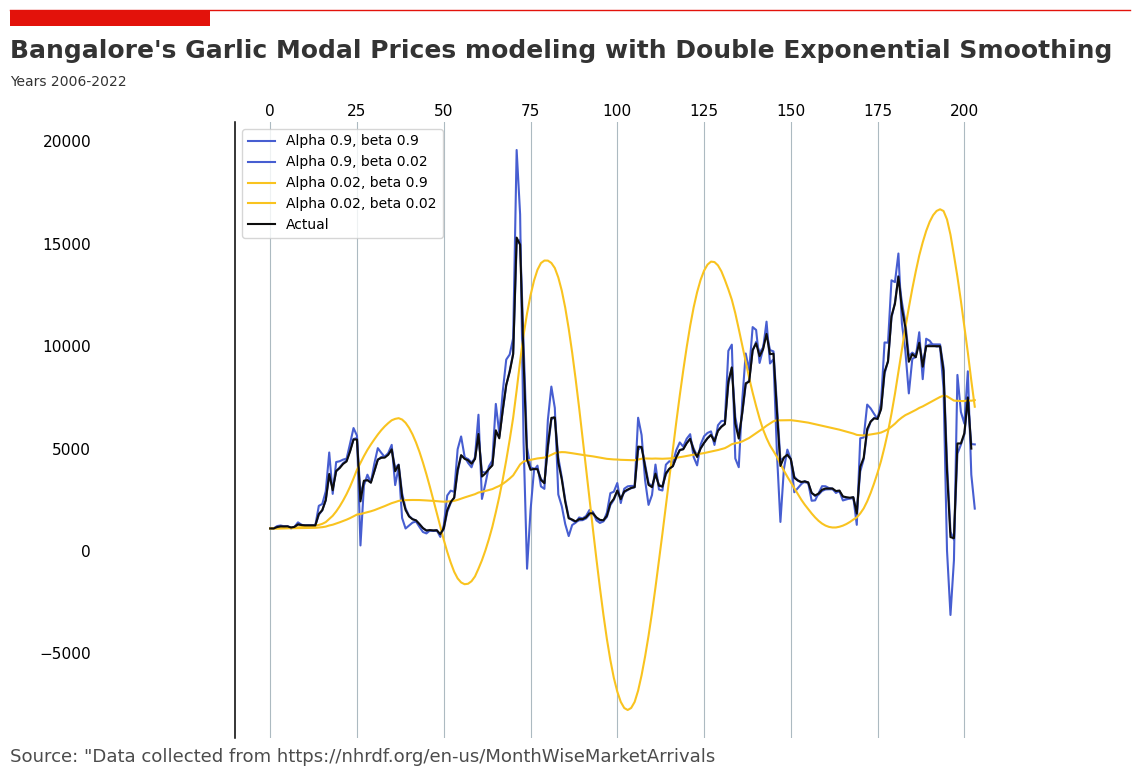

In [75]:
plotDoubleExponentialSmoothing(df_bang['priceMod'].reset_index(drop=True), alphas=[0.9, 0.02], betas=[0.9, 0.02])

# <font color=red><center> Stationary Time Series </center></font>

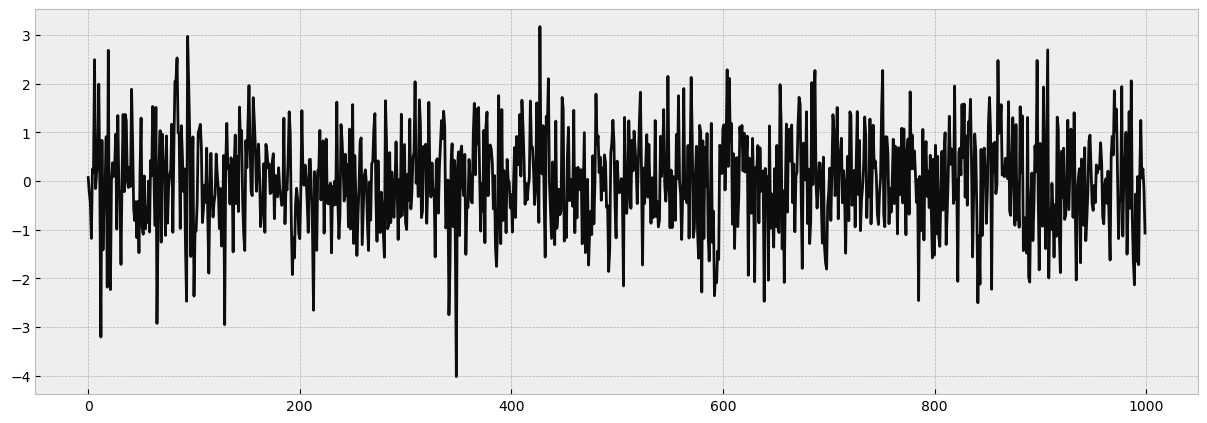

In [76]:
white_noise = np.random.normal(size=1000)
with plt.style.context("bmh"):
    plt.figure(figsize=(15, 5))
    plt.plot(white_noise,color='#0D0D0D')


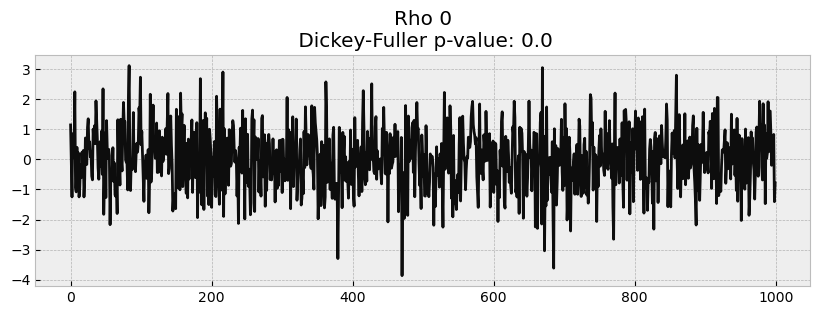

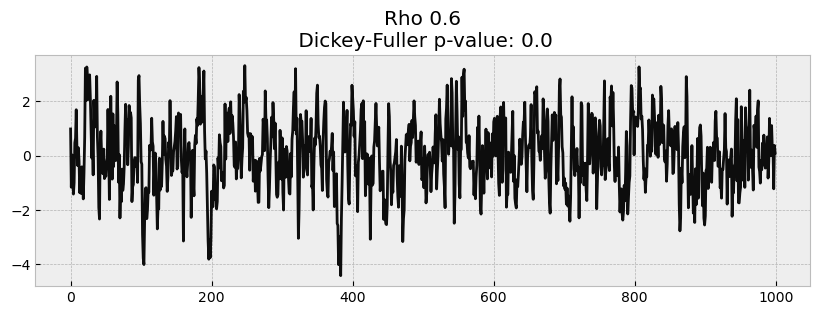

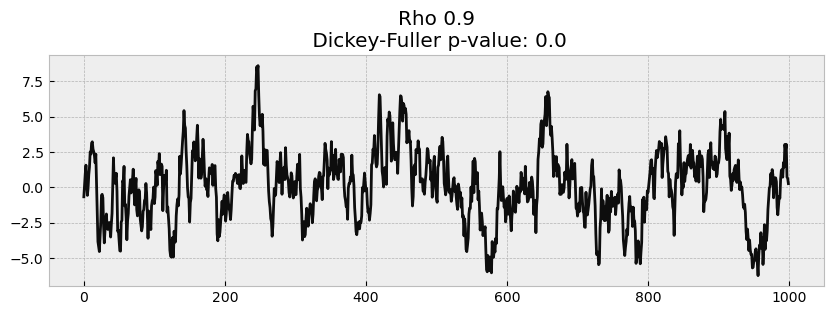

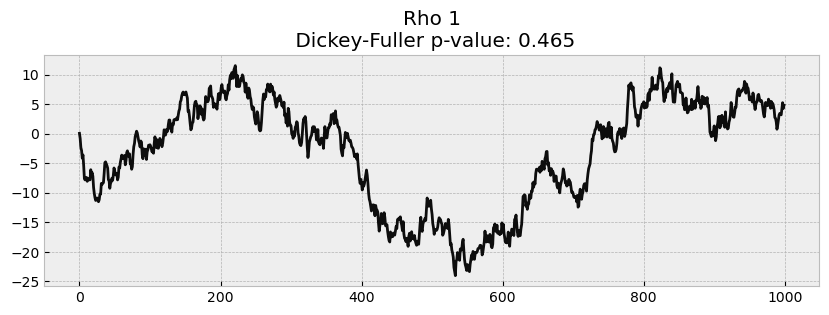

In [77]:
def plotProcess(n_samples=1000, rho=0):
    x = w = np.random.normal(size=n_samples)
    for t in range(n_samples):
        x[t] = rho * x[t - 1] + w[t]

    with plt.style.context("bmh"):
        plt.figure(figsize=(10, 3))
        plt.plot(x,color='#0D0D0D')
        plt.title(
            "Rho {}\n Dickey-Fuller p-value: {}".format(
                rho, round(sm.tsa.stattools.adfuller(x)[1], 3)
            )
        )


for rho in [0, 0.6, 0.9, 1]:
    plotProcess(rho=rho)

# Happy Learning